# GEO MEAN
* Load pickle file
* Plot using plotly
* Calculate GEO MEAN
* Find the stoping epoch (after Pretraining)
* Extarct Samples


In [237]:
import os 
import pandas as pd
import pickle
import plotly
from functools import reduce


In [238]:
pickle_path = '../logs/rho_1.pickle'

with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

### ploting

In [239]:
df = pd.DataFrame(pd.read_pickle(pickle_path))

pickle_path = pickle_path.replace('1','5')
df5 = pd.DataFrame(pd.read_pickle(pickle_path))

pickle_path = pickle_path.replace('5','10')
df10 = pd.DataFrame(pd.read_pickle(pickle_path))

pickle_path = pickle_path.replace('10','25')
df25 = pd.DataFrame(pd.read_pickle(pickle_path))

pickle_path = pickle_path.replace('25','100')
df100 = pd.DataFrame(pd.read_pickle(pickle_path))


In [240]:
pickle_path

'../logs/rho_100.pickle'

In [229]:
df5

,epoch,domain_acc,transfer_acc,blue,iteration
0,1,1.0000,0.5000,0.0152,100
1,1,1.0000,0.4171,0.0041,200
2,1,1.0000,0.5102,0.0084,300
3,1,1.0000,0.5068,0.0112,400
4,1,0.9986,0.5246,0.0183,500
...,...,...,...,...,...
562,20,0.9948,0.9133,0.4958,2500
563,20,0.9956,0.9249,0.4721,2600
564,20,0.9955,0.9147,0.4965,2700
565,20,0.9962,0.9402,0.4671,2800


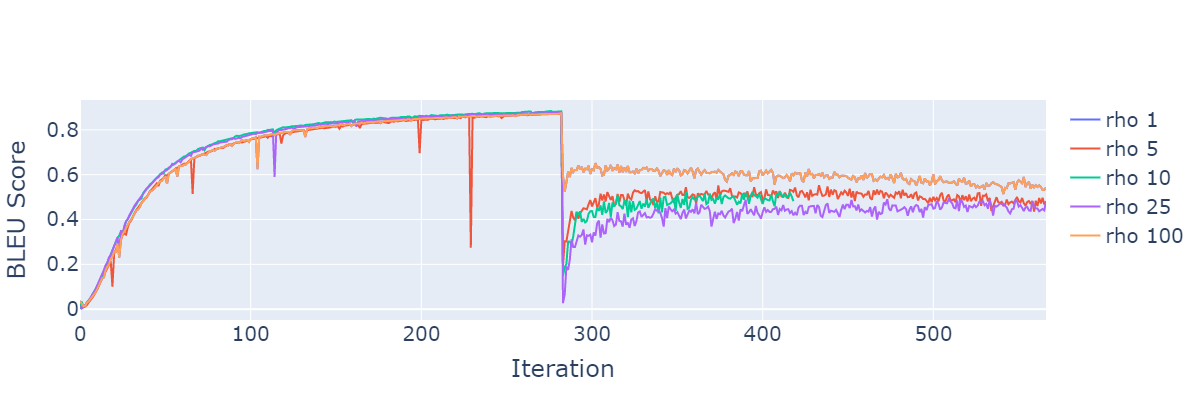

In [260]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.blue,
                    mode='lines',
                    name='rho 1'))
fig.add_trace(go.Scatter(x=df.index, y=df5.blue,
                    mode='lines',
                    name='rho 5'))

fig.add_trace(go.Scatter(x=df.index, y=df10.blue,
                    mode='lines',
                    name='rho 10'))

fig.add_trace(go.Scatter(x=df.index, y=df25.blue,
                    mode='lines',
                    name='rho 25'))

fig.add_trace(go.Scatter(x=df.index, y=df100.blue,
                    mode='lines',
                    name='rho 100'))
fig.update_layout(
                   yaxis_title='{}'.format('BLEU Score'),
                   xaxis_title='Iteration',  width=600,
    height=400,font=dict(
        size=20
    ))
fig.show()

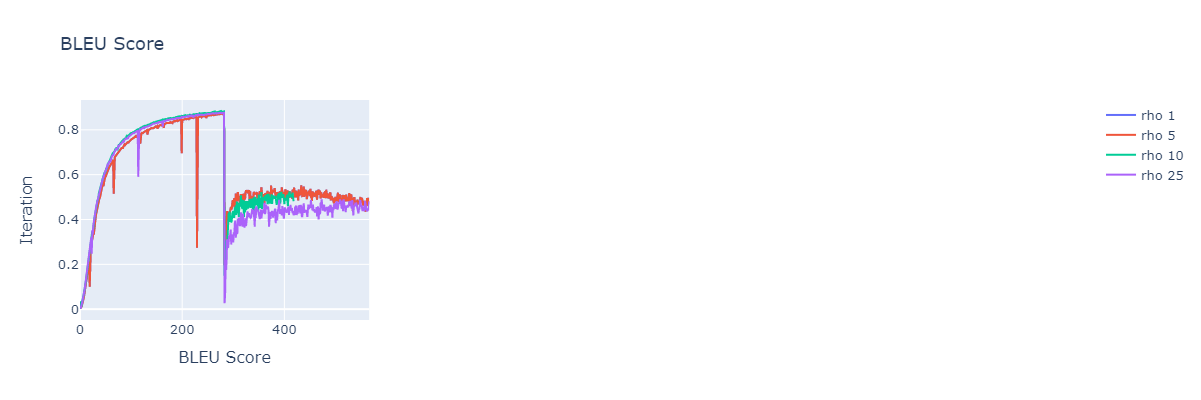

In [168]:

fig = plotly.subplots.make_subplots(rows=1,cols=3)


fig.append_trace(go.Scatter(x=df.index, y=df.blue,
                    mode='lines',
                    name='rho 1'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df5.blue,
                    mode='lines',
                    name='rho 5'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df10.blue,
                    mode='lines',
                    name='rho 10'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df25.blue,
                    mode='lines',
                    name='rho 25'),1,1)

fig.append_trace(go.Scatter(x=df.index, y=df.,
                    mode='lines',
                    name='rho 1'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df5.blue,
                    mode='lines',
                    name='rho 5'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df10.blue,
                    mode='lines',
                    name='rho 10'),1,1)
fig.append_trace(go.Scatter(x=df.index, y=df25.blue,
                    mode='lines',
                    name='rho 25'),1,1)

fig.update_layout(title='BLEU Score',
                   xaxis_title='BLEU Score',
                   yaxis_title='Iteration',    width=1000,
    height=400,font=dict(
        size=13
    ))
fig.show()

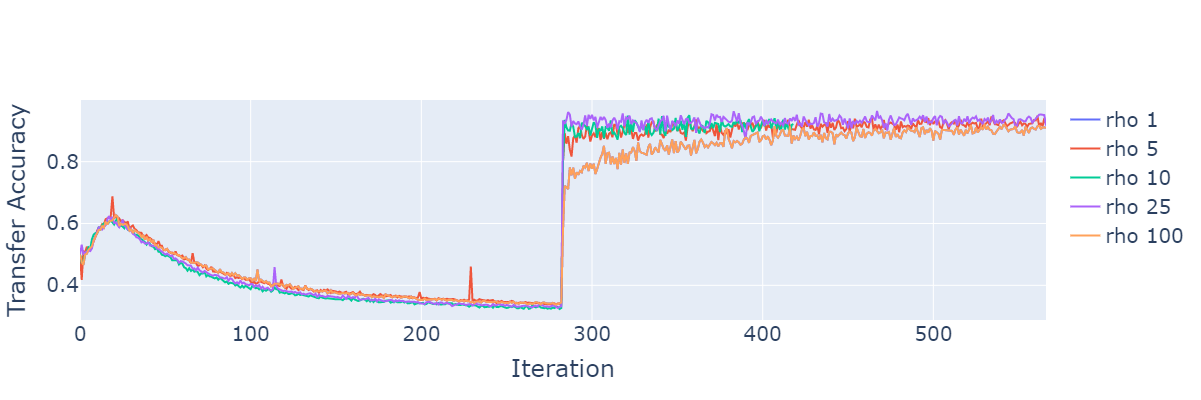

In [259]:
import plotly.graph_objects as go

column_name = 'transfer_acc'

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df[column_name],
                    mode='lines',
                    name='rho 1'))
fig.add_trace(go.Scatter(x=df.index, y=df5[column_name],
                    mode='lines',
                    name='rho 5'))

fig.add_trace(go.Scatter(x=df.index, y=df10[column_name],
                    mode='lines',
                    name='rho 10'))

fig.add_trace(go.Scatter(x=df.index, y=df25[column_name],
                    mode='lines',
                    name='rho 25'))

fig.add_trace(go.Scatter(x=df.index, y=df100[column_name],
                    mode='lines',
                    name='rho 100'))
fig.update_layout(
                   yaxis_title='Transfer Accuracy',
                   xaxis_title='Iteration',  width=600,
    height=400,font=dict(
        size=20
    ))
fig.show()

In [224]:
from functools import reduce
# Geometric Mean
def geomean(scores):
    return reduce(lambda x, y: x*y, scores)**(1.0/len(scores))

df['geomean'] = geomean([df5.blue,df5.transfer_acc])

## Early stoping 
* 1, 5, 25

In [243]:
df['geomean']  = geomean([df.blue,df.transfer_acc])
df5['geomean'] = geomean([df5.blue,df5.transfer_acc])
df10['geomean'] = geomean([df10.blue,df10.transfer_acc])
df25['geomean'] = geomean([df25.blue,df25.transfer_acc])
df100['geomean'] = geomean([df100.blue,df100.transfer_acc])


In [244]:
patience = 0
rho=1
rho_dict = {1:df,5:df5,25:df25,10:df10, 100:df100}
df_pick = rho_dict[rho]
df_train = df_pick[df_pick.epoch >=  11]

#df_train = df25[df25.epoch >=  11]
df_train['geomean'] = geomean([df_train.blue,df_train.transfer_acc])
df_train.reset_index(inplace=True)

best = -float('inf')
for idx in range(1 , df_train.shape[0]):
    now = df_train['geomean'].iloc[idx]
    #print("patience",patience)
    if now < best :
        patience += 1
        
    else :
        best = now 
        patience = 0 
    
    if patience == 30 :
        print("early stopped")
        print("epoch",df_train['epoch'].iloc[idx])
        early_stop_epoch = df_train['epoch'].iloc[idx]
        break


early stopped
epoch 13


/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [245]:
recon_dict = {}
transfer_dict = {}

sample_sentences=[
    'but i can not help it that i can not take my eyes off of you',
    'and I am a man of expanding so why should i stand in her way',
    'and i swear by the moon and the stars in the sky ill be there',
    'baby I am baby I am hurt and i do not want to play anymore',
    'then I am willing to wait for it wait for it wait for it',
    'every inch of your skin is a holy gray I have got to find',
    'i never thought that you would be the one to hold my heart',
    'if she changes her mind this is the first place she will go',
    'oh her eyes her eyes make the stars look like they are not shinin']

total_dict = {}
for i in range(1,21):
    original_result, reconstruction_result, transfer_result =[], [], []  
    select_epoch = i
    # load sample sentences
    with open('../logs/'+ 'rho' + str(rho) + '/' + 'domain_adapt/target/epoch'+ str(select_epoch) + '_reconstruction.txt', 'r') as f1:
        reconstruction = f1.readlines()
    with open('../logs/'+ 'rho'+ str(rho) + '/' + 'domain_adapt/target/epoch'+ str(select_epoch) + '_transfer.txt', 'r') as f2:
        transfer = f2.readlines()
    
    idx_list = []
    for idx, recon in enumerate(reconstruction):
        if recon.split('\t')[0] in sample_sentences:
            original_result.append(recon.split('\t')[0]) 
            reconstruction_result.append(recon.split('\t')[1]) 
            idx_list.append(idx)
    
    for j in idx_list:
        transfer_result.append(transfer[int(j)].split('\t')[1])
    total_dict[i] = {'original': original_result, 'recon': reconstruction_result, 'transfer': transfer_result}


with open('transfer_list/sample_result_' + str(rho) + '.pickle', 'wb') as result:
    pickle.dump(total_dict, result)


import pandas as pd
tmp  = pd.read_pickle("./transfer_list/sample_result_" +str(rho)+  ".pickle")
df_result = pd.DataFrame({})
epoch=1
for epoch in tmp.keys():
    df_result = df_result.append(pd.DataFrame({'epoch' : [epoch] * len(tmp[epoch]['original']), 'id':list(range( len(tmp[epoch]['original']))),
                                               'original':tmp[epoch]['original'], 'reconstruct':tmp[epoch]['recon'], 'transfer':tmp[epoch]['transfer']}))
    
df_result.to_csv("rho" +str(rho) +".csv")
df_ = df_pick.copy()
grs = df_.groupby('epoch')
df_epoch = []
for epoch in grs.groups.keys():
    df_epoch.append({'blue':grs.get_group(epoch).blue.mean(),'transfer_acc':grs.get_group(epoch).transfer_acc.mean(),'domain_acc':grs.get_group(epoch).domain_acc.mean(), 'geo_mean':grs.get_group(epoch).geomean.mean()})
df_epoch = pd.DataFrame(df_epoch)
df_epoch.index = range(1,21)
df_epoch['epoch'] = range(1,21)
df_final = df_result.join(df_epoch, on='epoch' ,lsuffix ="_s")
df_final.to_csv("final_result_rho" + str(rho)+ ".csv")

In [235]:
rho

5

In [247]:
df_final[df_result.epoch==13]

,epoch_s,id,original,reconstruct,transfer,blue,transfer_acc,domain_acc,geo_mean,epoch
0,13,0,if she changes her mind this is the first plac...,if she changes her mind this is the first plac...,if she changes her mind this is the first plac...,0.611918,0.849143,0.992332,0.720725,13
1,13,1,i never thought that you would be the one to h...,i never thought that you would be the one to h...,i never thought that you would be the motherfu...,0.611918,0.849143,0.992332,0.720725,13
2,13,2,oh her eyes her eyes make the stars look like ...,oh her eyes her eyes make the stars look like ...,oh her eyes her eyes make the stars look like ...,0.611918,0.849143,0.992332,0.720725,13
3,13,3,and I am a man of expanding so why should i st...,and I am a man of nana so why should i stand i...,and I am a man of yours so why should i stand ...,0.611918,0.849143,0.992332,0.720725,13
4,13,4,and I am a man of expanding so why should i st...,and I am a man of nana so why should i stand i...,and I am a man of yours so why should i stand ...,0.611918,0.849143,0.992332,0.720725,13
5,13,5,every inch of your skin is a holy gray I have ...,every inch of your skin is a pink beating I ha...,every mcs of your brothers is a dandy uhh I ha...,0.611918,0.849143,0.992332,0.720725,13
6,13,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am skirts to wait for it wait for it um...,0.611918,0.849143,0.992332,0.720725,13
7,13,7,baby I am baby I am hurt and i do not want to ...,baby I am baby I am hurt and i do not want to ...,baby I am baby I am hurt and i do not slap to ...,0.611918,0.849143,0.992332,0.720725,13
8,13,8,and i swear by the moon and the stars in the s...,and i swear by the moon and the stars in the s...,and i swear by the moon and the short in the s...,0.611918,0.849143,0.992332,0.720725,13
9,13,9,and I am a man of expanding so why should i st...,and I am a man of nana so why should i stand i...,and I am a man of yours so why should i stand ...,0.611918,0.849143,0.992332,0.720725,13


In [96]:
tmp.reset_index(inplace=True)

In [81]:
tmp['geomean'][0]

0.3950844972914022

## geo mean Early stopping 

In [33]:
df5['geomean'] = geomean([df5.blue,df5.transfer_acc])
df10['geomean'] = geomean([df10.blue,df10.transfer_acc])
df25['geomean'] = geomean([df25.blue,df25.transfer_acc])
df100['geomean'] = geomean([df100.blue,df100.transfer_acc])


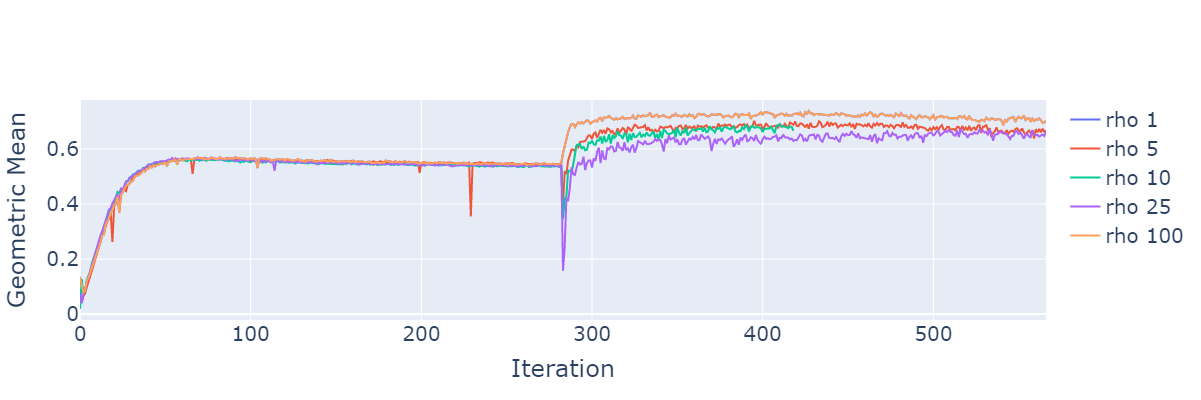

In [257]:
import plotly.graph_objects as go

column_name = 'geomean'

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df[column_name],
                    mode='lines',
                    name='rho 1'))
fig.add_trace(go.Scatter(x=df.index, y=df5[column_name],
                    mode='lines',
                    name='rho 5'))

fig.add_trace(go.Scatter(x=df.index, y=df10[column_name],
                    mode='lines',
                    name='rho 10'))

fig.add_trace(go.Scatter(x=df.index, y=df25[column_name],
                    mode='lines',
                    name='rho 25'))

fig.add_trace(go.Scatter(x=df.index, y=df100[column_name],
                    mode='lines',
                    name='rho 100'))


fig.update_layout(
                   xaxis_title='Iteration',
                   yaxis_title='Geometric Mean',  width=600,
    height=400,font=dict(
        size=20
    ))

fig.show()

In [140]:
rho = 25
recon_dict = {}
transfer_dict = {}

sample_sentences=[
    'but i can not help it that i can not take my eyes off of you',
    'and I am a man of expanding so why should i stand in her way',
    'and i swear by the moon and the stars in the sky ill be there',
    'baby I am baby I am hurt and i do not want to play anymore',
    'then I am willing to wait for it wait for it wait for it',
    'every inch of your skin is a holy gray I have got to find',
    'i never thought that you would be the one to hold my heart',
    'if she changes her mind this is the first place she will go',
    'oh her eyes her eyes make the stars look like they are not shinin']

total_dict = {}
for i in range(1,21):
    original_result, reconstruction_result, transfer_result =[], [], []  
    select_epoch = i
    # load sample sentences
    with open('../logs/'+ 'rho' + str(rho) + '/' + 'domain_adapt/target/epoch'+ str(select_epoch) + '_reconstruction.txt', 'r') as f1:
        reconstruction = f1.readlines()
    with open('../logs/'+ 'rho'+ str(rho) + '/' + 'domain_adapt/target/epoch'+ str(select_epoch) + '_transfer.txt', 'r') as f2:
        transfer = f2.readlines()
    
    idx_list = []
    for idx, recon in enumerate(reconstruction):
        if recon.split('\t')[0] in sample_sentences:
            original_result.append(recon.split('\t')[0]) 
            reconstruction_result.append(recon.split('\t')[1]) 
            idx_list.append(idx)
    
    for j in idx_list:
        transfer_result.append(transfer[int(j)].split('\t')[1])
        if j == 8006 : print(transfer[int(j)].split('\t')[1])
    total_dict[i] = {'original': original_result, 'recon': reconstruction_result, 'transfer': transfer_result}


with open('transfer_list/sample_result_' + str(rho) + '.pickle', 'wb') as result:
    pickle.dump(total_dict, result)




every colors of your car is a gold digger I have got to find

every gangsta of your skin is a blind uhuh I never has given to

every vision of your skin is a lonely wine you been got to find

every gangsta of your skin is a age playing you I has to find

every inch of your skin is a microphone playing I have got to find

every inch of your skin is a age geek I have got to find

every inch of your skin is a holy playing I have got to find

every inch of your skin is a holy geek I have got to find

every inch of your skin is a holy playing I have got to find

every inch of your skin is a holy gray I have got to find

this dig of your weed is a lecture crush the police got to left

every awareness of your skin is a superior off i am got to left

every stain of your skin is a microphone bee I am got crush

every stain of your skin is a sayin off I am got to find

every pack of your style is a closet paid I have got to find

real colors of your stage is a nine off you have got to find

ever

In [141]:
total_dict

{1: {'original': ['if she changes her mind this is the first place she will go',
   'i never thought that you would be the one to hold my heart',
   'oh her eyes her eyes make the stars look like they are not shinin',
   'and I am a man of expanding so why should i stand in her way',
   'and I am a man of expanding so why should i stand in her way',
   'every inch of your skin is a holy gray I have got to find',
   'then I am willing to wait for it wait for it wait for it',
   'baby I am baby I am hurt and i do not want to play anymore',
   'and i swear by the moon and the stars in the sky ill be there',
   'and I am a man of expanding so why should i stand in her way',
   'but i can not help it that i can not take my eyes off of you'],
  'recon': ['if she came her mind this is the second show i want to\n',
   'i never thought that you would be the way to my heart\n',
   'oh her eyes her eyes make the same way so just be you down\n',
   'and I am a man of bobby can not know you in her 

In [142]:
import pandas as pd
tmp  = pd.read_pickle("./transfer_list/sample_result_1.pickle")
df_result = pd.DataFrame({})
epoch=1
for epoch in tmp.keys():
    df_result = df_result.append(pd.DataFrame({'epoch' : [epoch] * len(tmp[1]['original']), 'id':list(range( len(tmp[1]['original']))),'original':tmp[1]['original'], 'reconstruct':tmp[1]['recon'], 'transfer':tmp[1]['transfer']}))

In [143]:
import pandas as pd
tmp  = pd.read_pickle("./transfer_list/sample_result_25.pickle")

In [144]:

tmp.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [145]:
df_result = pd.DataFrame({})
for epoch in tmp.keys():
    df_result = df_result.append(pd.DataFrame({'epoch' : [epoch] * len(tmp[epoch]['original']), 'id':list(range( len(tmp[epoch]['original']))),'original':tmp[epoch]['original'], 'reconstruct':tmp[epoch]['recon'], 'transfer':tmp[epoch]['transfer']}))

In [146]:
df_result[df_result.id ==6]

,epoch,id,original,reconstruct,transfer
6,1,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it out to watch ...,then I am willing to wait for it is going to w...
6,2,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,3,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,4,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,5,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,6,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,7,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,8,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,9,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...
6,10,6,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...,then I am willing to wait for it wait for it w...


In [147]:
df_result.to_csv("rho" +str(rho) +".csv")

df_ = df25.copy()
grs = df_.groupby('epoch')

df_epoch = []

for epoch in grs.groups.keys():
    df_epoch.append({'blue':grs.get_group(epoch).blue.mean(),'transfer_acc':grs.get_group(epoch).transfer_acc.mean(),'domain_acc':grs.get_group(epoch).domain_acc.mean(), 'geo_mean':grs.get_group(epoch).geomean.mean()})

df_epoch = pd.DataFrame(df_epoch)

df_epoch.index = range(1,21)

df_epoch['epoch'] = range(1,21)


df_final = df_result.join(df_epoch, on='epoch' ,lsuffix ="_s")

df_final.to_csv("final_result_rho" + str(rho)+ ".csv")

In [68]:
df_result.reset_index(drop=True).shape

(220, 5)

In [67]:
df_epoch.shape

(20, 5)

In [186]:
df_epoch.to_csv('rho1_scores.csv')